INSTALLING MODULES

In [15]:
!pip install emoji
import emoji

     |████████████████████████████████| 170 kB 14.3 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=5ee6750df50fe58dacec8a69d496926810e9b9878fb15e4fc83e62157779ff59
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [16]:
!pip install pyspellchecker
import spellchecker

     |████████████████████████████████| 2.7 MB 14.2 MB/s 


MOUNTING GOOGLE DRIVE

In [17]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


IMPORTING LIBRARIES

In [18]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag 
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from nltk.corpus import stopwords 
import re,string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup
from spellchecker import SpellChecker
import emoji
import pandas as pd
#from googletrans import Translator
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from nltk.corpus import wordnet
from sklearn.metrics import classification_report


#pyspellchecker
spell = SpellChecker()

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


LOADING DATASET

In [19]:
data = pd.read_csv("drive/MyDrive/CD PROJECT/sentiment140.csv",skip_blank_lines=True) 
data
#0:Negative & 4:Positive according to the dataset

,Label,number,date,no_query,name,Tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
4995,4,1468239135,Tue Apr 07 00:28:57 PDT 2009,NO_QUERY,Radt,@radcs when are you putting a photo up?
4996,4,1468239145,Tue Apr 07 00:28:57 PDT 2009,NO_QUERY,Disaster08,"oh wait, thunderstorms tomorrow?! ohSHIT, then..."
4997,4,1468239164,Tue Apr 07 00:28:58 PDT 2009,NO_QUERY,lilac_dreamer,@gwane and I'd go with either a nose ring or a...
4998,4,1468239307,Tue Apr 07 00:29:01 PDT 2009,NO_QUERY,TButt1983,what that - dissertation script is finished an...


DATA PREPROCESSING

1. Changing Labels

In [20]:
#0 to negative and 4 to positive
l=[]
for i in data["Label"]:
    if(i==0):
        l.append("negative")
    else:
        l.append("positive")
data['Comment']=l

data

,Label,number,date,no_query,name,Tweet,Comment
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,negative
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,negative
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,negative
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",negative
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,negative
...,...,...,...,...,...,...,...
4995,4,1468239135,Tue Apr 07 00:28:57 PDT 2009,NO_QUERY,Radt,@radcs when are you putting a photo up?,positive
4996,4,1468239145,Tue Apr 07 00:28:57 PDT 2009,NO_QUERY,Disaster08,"oh wait, thunderstorms tomorrow?! ohSHIT, then...",positive
4997,4,1468239164,Tue Apr 07 00:28:58 PDT 2009,NO_QUERY,lilac_dreamer,@gwane and I'd go with either a nose ring or a...,positive
4998,4,1468239307,Tue Apr 07 00:29:01 PDT 2009,NO_QUERY,TButt1983,what that - dissertation script is finished an...,positive


2. Dropping unwanted columns

In [21]:
data=data.drop(columns=['number', 'date','name','no_query','Label'])
data

,Tweet,Comment
0,is upset that he can't update his Facebook by ...,negative
1,@Kenichan I dived many times for the ball. Man...,negative
2,my whole body feels itchy and like its on fire,negative
3,"@nationwideclass no, it's not behaving at all....",negative
4,@Kwesidei not the whole crew,negative
...,...,...
4995,@radcs when are you putting a photo up?,positive
4996,"oh wait, thunderstorms tomorrow?! ohSHIT, then...",positive
4997,@gwane and I'd go with either a nose ring or a...,positive
4998,what that - dissertation script is finished an...,positive


3. Removing Emoticons

In [22]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [23]:
def emoticons():    
    return {
        ":)":"smiley",
        ":‑)":"smiley",
        ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":]":"smiley",
        ":3":"smiley",
        ":>":"smiley",
        "8)":"smiley",
        ":}":"smiley",
        ":o)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        "=]":"smiley",
        "=)":"smiley",
        ":-))":"smiley",
        ":‑D":"smiley",
        "8‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "8D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":'‑(":"sad",
        ":'(":"sad",
        ":((((":"sad",
        ":(((":"sad",
        ":((":"sad",
        ":(":"sad",
        ":/":"sad",
        ":///":"sad",
        ":////":"sad",
        "://///":"sad",
        "://":"sad",
        ":///////":"sad",
        ":////":"sad",
        "-_-":"angry",
        ":|":"normal",
        ";)":"playful",
        ";D":"playful",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love"
        }

4. Replace contraction

In [24]:
def contractions():
    return {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "ily":"I love you",
        "Ily":"I love you",
        "Ihy":"I hate you",
        "ihy":"I hate you",
        "imy":"I miss you",
        "Imy":"I miss you",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "im":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks",
        "shit":"bad",
        "tmr":"tomorrow",
        "tmrw":"tomorrow",
        "u":"you",
        "ur":"your",
        "k":"okay",
        "ok":"okay",
        "da":"the",
        "tom":"tomorrow",
        "Tom":"tomorrow",
        "v'll":"we will",
        "wassup":"what is up with you",
        "waddup":"what is up with you",
        "yo":"greet",
        "hey":"greet",
        "lol":"laugh",
        "lmao":"laugh",
        "Lmao":"laugh",
        "rofl":"laugh",
        "y":"why",
        "wut":"what",
        "wat":"what",
        "stfu":"angry",
        "wtf":"angry",
        "ya":"yes",
        "yeah":"yes",
        "ummmm":"confused",
        "ummm":"confused",
        "umm":"confused",
        "hmmm":"confused",
        "i'm":"I am",
        "awww":"amazement",
        "Awww":"amazement",
        "aww":"amazement",
        "Aww":"amazement",
        "can't":"cannot",
        "Can't":"cannot",
        "CAN'T":"cannot",
        "awe":"amazement",
        "Awe":"amazement",
        "ugh":"sad",
        "ughh":"sad",
        "Ugh":"sad",
        "Ughh":"sad",
        "UGHH":"sad",
        "ughhhh":"sad",
        "ughhh":"sad"
        }

*5*. Lemmatization

In [25]:
#Lemmatization : Root form of words in tweet

def lemmatization(sent):
    lemmatize=WordNetLemmatizer()
    sentence_after_lemmatization=[]
    for word,tag in pos_tag(word_tokenize(sent)):
        if(tag[0:2]=="NN"):
            pos='n'
        elif(tag[0:2]=="VB"):
            pos='v'
        else:
            pos='a'
        lem=lemmatize.lemmatize(word,pos)
        sentence_after_lemmatization.append(lem)
        
    st=""
    
    for i in sentence_after_lemmatization:
        if(i!="be" and i!="is" and len(i)!=1):
            st=st+" "+i
    
    c=0
    list_text=st.split()
    flag=0
    new_st=""
    for i in list_text:
        temp=i
        if(flag==1):
            flag=0
            continue
        if(i=="not" and (c+1)<len(list_text)):
            for syn in wordnet.synsets(list_text[c+1]):
                antonyms=[]
                for l in syn.lemmas():
                   if l.antonyms():
                        antonyms.append(l.antonyms()[0].name())
                        temp=antonyms[0]
                        flag=1
                        break
                if(flag==1):
                    break
        new_st=new_st+" "+temp
        c+=1
    return new_st

6. Removal of Noise

In [26]:
def removal_of_noise(sent):
    clean_sent=[]
    temp_st=""
    list_sent=sent.split(" ")
    c=0
    d=contractions()
    emoji=emoticons()
    for word in list_sent:
        #removal of url 
        word = re.sub(r"http\S+", "", word)
        word = re.sub(r"[www.][a-zA-Z0-9_]+[.com]", "", word)
        #removal of account handles '@'
        word = re.sub("(@[A-Za-z0-9_]+)","", word) 
        
        #replacing emoticons with their respective words
        if(word in emoji.keys()):
            word=emoji[word]
        #replacing short form words with their full form
        if(word.lower() in d.keys()):
            word=d[word.lower()]
        if(c==0):
            temp_st=word
        else:
            temp_st=temp_st+" "+word
        c=c+1
    sent=temp_st
    stop_words = set(stopwords.words('english'))
    stop_words.add('is')
    stop_words.remove('not')
    for word in word_tokenize(sent):
        if(word.lower() not in stop_words and word.lower() not in string.punctuation and word!="'" and word!='"' ):
            #print(word)
            word=spell.correction(word.lower())
            word=re.sub("[0-9]+","",word)
            word=re.sub("[.]+"," ",word)
            word=re.sub("[-]+"," ",word)
            word=re.sub("[_]+"," ",word)
            word = re.sub("~"," ", word) 
            if(len(word)!=1):
                clean_sent.append(word.lower())
    cleaned_st=""
    for i in clean_sent:
        cleaned_st=cleaned_st+" "+i
    #print(cleaned_st)
    return lemmatization(cleaned_st)

7. Preproc() calls all other preprocessing functions

In [32]:
def preproc(text):
  #HTML tags are removed below
  text =BeautifulSoup(text).get_text()
  text =text.replace("’","'")
  new_text=sent_tokenize(text)
  result=0
  new_str=""
  #Emoticons removal + Noise Removal
  for i in new_text:
    j=deEmojify(i)
    res=removal_of_noise(j)
    new_str=new_str+" "+res
  return new_str

In [39]:
>>> import nltk
>>> nltk.download('punkt')
>>> nltk.download('stopwords')
>>> nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

8. Display Cleaned Tweets

In [40]:
clean_list=[]
for i in data["Tweet"]:
    print()
    print(i)
    x=preproc(i)
    clean_list.append(x)
    print()
    print(x)
    print("-------------------------")

Streaming output truncated to the last 5000 lines.

@Malunis Ohh! Classics Armada. I'd want the Seekers in that series, or the minicons. 

  oh  classic armada  'd want seeker series minion
-------------------------

@TerryFree Yes unfortunately, but did have a day off yesterday and got another on Friday so its a 3 day week 

  yes unfortunately day yesterday get another friday day week
-------------------------

@ElementsOfJazz Good question, had a bit of a rough day and physically not well but I'm hanging in there and still smiling 

  good question bit rough day physically ill hang still smile
-------------------------

@steeltrain that's awesome you guys!!!  support 

  ae guy  support
-------------------------

@knitster totally need to be! Everything breaks or aches too much. Need a new body! 

  totally need  everything break ache much  need new body
-------------------------

@loveistoartas I love that movie. 

  love movie
-------------------------

Is writing a new song  so s

9. Writing Cleaned Tweets to a file

In [41]:
with open('cleaned_tweet.txt', 'w') as f:
    for item in clean_list:
        f.write("%s\n" % item)   

10. Adding Cleaned Tweets as a column to data

In [42]:
#reading from file cleaned tweets and storing in a cleaned tweets column in the dataframe
filename = "cleaned_tweet.txt"
with open(filename) as f:
    lines = f.read().splitlines()
lines
data["cleaned_tweets"]=lines

11. Display preprocessed data

In [43]:
data

,Tweet,Comment,cleaned_tweets
0,is upset that he can't update his Facebook by ...,negative,upset not update facebook texting might cry ...
1,@Kenichan I dived many times for the ball. Man...,negative,dive many time ball manage save rest go bound
2,my whole body feels itchy and like its on fire,negative,le body feels itchy like fire
3,"@nationwideclass no, it's not behaving at all....",negative,misbehave mad not see
4,@Kwesidei not the whole crew,negative,not le crew
...,...,...,...
4995,@radcs when are you putting a photo up?,positive,put photo
4996,"oh wait, thunderstorms tomorrow?! ohSHIT, then...",positive,oh wait thunderstorm tomorrow ofshit yay l...
4997,@gwane and I'd go with either a nose ring or a...,positive,'d go either nose ring eyebrow bar opinion
4998,what that - dissertation script is finished an...,positive,dissertation script finish tutor final readi...


EXTRACTING ADJECTIVES 

1. Reading adjective file

In [44]:
filename = "drive/MyDrive/CD PROJECT/english_adjectives.txt"
with open(filename) as f:
    lines = f.read().splitlines()
lines
adjectives=lines

2. Exatracting adjectives from the tweets

In [45]:
all_words=[]
negative=["not"]
for i in data["cleaned_tweets"]:
    for word in word_tokenize(i):
        if(word in adjectives or word in negative):
          all_words.append(word)

3. Create frequency adjective districbution

In [46]:
import nltk
BagOfWords = nltk.FreqDist(all_words)
#BagOfWords
#len(BagOfWords)
word_features = list(BagOfWords.keys())[:5000]
#len(word_features)
#word_features

4. Replacing each cleaned tweet with features

In [47]:
new_list=[]
for i in data["cleaned_tweets"]:
    st=""
    for j in i.split():
        if(j in word_features):
            st=st+" "+j
    new_list.append(st)
    
data["cleaned_tweets"]=new_list

5. Display data with their features

In [48]:
data

,Tweet,Comment,cleaned_tweets
0,is upset that he can't update his Facebook by ...,negative,upset not
1,@Kenichan I dived many times for the ball. Man...,negative,
2,my whole body feels itchy and like its on fire,negative,itchy
3,"@nationwideclass no, it's not behaving at all....",negative,mad not
4,@Kwesidei not the whole crew,negative,not
...,...,...,...
4995,@radcs when are you putting a photo up?,positive,
4996,"oh wait, thunderstorms tomorrow?! ohSHIT, then...",positive,love love love
4997,@gwane and I'd go with either a nose ring or a...,positive,
4998,what that - dissertation script is finished an...,positive,


TRAING AND TESTING

1. Training and Testing Dataframes

In [49]:
y=data["Comment"]
x=data.drop('Comment',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [50]:
X_train = pd.DataFrame(columns=['Tweet','cleaned_tweets'])
X_test = pd.DataFrame(columns=['Tweet','cleaned_tweets'])
Y_train = []
Y_test = []
X_train = X_train.append(x_train)
for i in y_test:
    Y_test.append(i)
for i in y_train:
     Y_train.append(i)
X_test = X_test.append(x_test)

2. Training sets

In [51]:
training_set=[]
count=0
for i in (X_train["cleaned_tweets"]):
    training_set.append((i.split(),Y_train[count]))
    count+=1

def list_to_dict(words_list):
    return dict([(word, True) for word in words_list])

training_set_formatted = [(list_to_dict(element[0]), element[1]) for element in training_set]
#training_set_formatted

3. Testing Sets

In [52]:
test_set=[]
count=0
for i in (X_test["cleaned_tweets"]):
    test_set.append((i.split(),Y_test[count]))
    count+=1    

def list_to_dict(words_list):
    return dict([(word, True) for word in words_list])
 
test_set_formatted= [(list_to_dict(element[0]), element[1]) for element in test_set]

4. List to store classifiers being used

In [53]:
from sklearn.metrics import recall_score,precision_score
classifiers=[]
accuracy=[]

5. Logistic Regression Model

In [58]:
print("LOGISTIC REGRESSION\n")
LogReg_clf = SklearnClassifier(LogisticRegression())
LogReg_clf.train(training_set_formatted)
print("Acuracy Percentage = ", (nltk.classify.accuracy(LogReg_clf, test_set_formatted))*100)
accuracy.append([(nltk.classify.accuracy(LogReg_clf, test_set_formatted))*100,"LogReg"])
classifiers.append([LogReg_clf,"LogisticRegression"])
target_names = [ 'positive','negative']
print("\nClassifiaction Report\n")
print(classification_report(Y_test, preds, target_names=target_names))

LOGISTIC REGRESSION

Acuracy Percentage =  60.8

Classifiaction Report

              precision    recall  f1-score   support

    positive       0.56      0.79      0.65       357
    negative       0.69      0.44      0.54       393

    accuracy                           0.60       750
   macro avg       0.63      0.61      0.60       750
weighted avg       0.63      0.60      0.59       750



6. Naive Bayes Model

In [57]:
print("NAIVE BAYES\n")
classifier = nltk.NaiveBayesClassifier.train(training_set_formatted)
print("Accuracy Percentage = ", (nltk.classify.accuracy(classifier, test_set_formatted))*100)
classifiers.append([classifier,"NaiveBayes"])
accuracy.append([(nltk.classify.accuracy(classifier, test_set_formatted))*100,"NB"])
target_names = [ 'positive','negative']
print("\nClassifiaction Report\n")
print(classification_report(Y_test, preds, target_names=target_names))

NAIVE BAYES

Accuracy Percentage =  60.4

Classifiaction Report

              precision    recall  f1-score   support

    positive       0.56      0.79      0.65       357
    negative       0.69      0.44      0.54       393

    accuracy                           0.60       750
   macro avg       0.63      0.61      0.60       750
weighted avg       0.63      0.60      0.59       750



7. Confusion Matrix

Confusion matrix, without normalization
[[281  76]
 [221 172]]
Normalized confusion matrix
[[0.79 0.21]
 [0.56 0.44]]


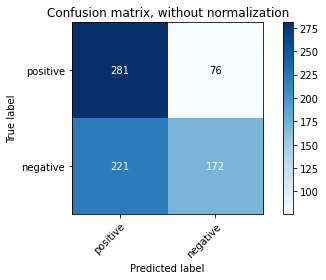

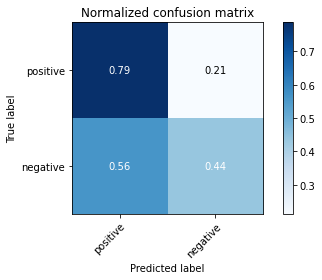

In [59]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np 


class_names = [ 'positive','negative']

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues): 
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           #labels according to classess
           yticks=np.arange(cm.shape[0]),xticklabels=classes, yticklabels=classes,title=title,ylabel='True label',xlabel='Predicted label')

    # Rotate  tick labels and set  alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Confusion matrix, without normalization
plot_confusion_matrix(Y_test, preds, classes=class_names,title='Confusion matrix, without normalization')

#Normalized confusion matrix
plot_confusion_matrix(Y_test, preds, classes=class_names, normalize=True,title='Normalized confusion matrix')

plt.show()

BILLINGUAL TWEETS ( TAMIL + ENGLISH)

In [60]:
!pip uninstall googletrans

Found existing installation: googletrans 4.0.0rc1
Uninstalling googletrans-4.0.0rc1:
  Would remove:
    /usr/local/bin/translate
    /usr/local/lib/python3.7/dist-packages/googletrans-4.0.0rc1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/googletrans/*
Proceed (y/n)? y
  Successfully uninstalled googletrans-4.0.0rc1


In [62]:
!pip install googletrans==4.0.0-rc1

1. Import libraries

In [63]:
from googletrans import Translator
translator = Translator(service_urls=['translate.googleapis.com'])


2. Function to create List of Features

In [64]:
def features(text):
    new_list=[]
    for i in text.split():
        if(i in adjectives):
            new_list.append(i)
    return new_list

3.  Classify Function
      1.  PreProcessing
      2. Extract Features
      3. Test Data using Classifiers
      4. Print Result

In [65]:
def text_classify(text):
    cleaned_text=preproc(text)
    temp=features(cleaned_text)
    test_data=list_to_dict(temp)
    print(temp)
    print("Tweet given by user : ",text)
    for i in classifiers:
        print(i[1])
        determined_label=i[0].classify(test_data)
        print("This Tweet is ",determined_label)
        print("------------------------------")
  

4. Translating users input to english

In [66]:
#input from the user which will be used to classify 
def tanglish(input_text):
    translator = Translator(service_urls=['translate.google.co.in'])
    x=translator.translate(input_text,src="ta",dest="en")
    text_classify(x.text)

In [67]:
#input from the user which will be used to classify 
from textblob import TextBlob
def tanglish2(input_text):
    l=input_text.split()
    st=""
    for i in l:
        word=TextBlob(i)
        if(word.detect_language()=="ta"):
            translator = Translator(service_urls=['translate.google.co.in'])
            x=translator.translate(i,src="ta",dest="en")
            st=st+" "+x.text
        else:
            st=st+" "+i
    text_classify(st)

In [68]:
def func(input_text):
    l=input_text.split()
    flag=0
    for i in l:
        k=len(i)
        if(k<3):
            flag=1
            tanglish(input_text)
    if(not(flag)):
        tanglish2(input_text)

In [69]:
func("saapadu is bad")

['bad']
Tweet given by user :  Meals Is Bad
LogisticRegression
This Tweet is  negative
------------------------------
NaiveBayes
This Tweet is  negative
------------------------------
NaiveBayes
This Tweet is  negative
------------------------------
NaiveBayes
This Tweet is  negative
------------------------------
LogisticRegression
This Tweet is  negative
------------------------------


In [70]:
func("Today is a gud day")

['good']
Tweet given by user :  Today Is a Good Day
LogisticRegression
This Tweet is  positive
------------------------------
NaiveBayes
This Tweet is  positive
------------------------------
NaiveBayes
This Tweet is  positive
------------------------------
NaiveBayes
This Tweet is  positive
------------------------------
LogisticRegression
This Tweet is  positive
------------------------------
['good']
Tweet given by user :  Today Is a Good Day
LogisticRegression
This Tweet is  positive
------------------------------
NaiveBayes
This Tweet is  positive
------------------------------
NaiveBayes
This Tweet is  positive
------------------------------
NaiveBayes
This Tweet is  positive
------------------------------
LogisticRegression
This Tweet is  positive
------------------------------


In [71]:
func("it is a big veedu")

['big']
Tweet given by user :  It's A Big House
LogisticRegression
This Tweet is  positive
------------------------------
NaiveBayes
This Tweet is  positive
------------------------------
NaiveBayes
This Tweet is  positive
------------------------------
NaiveBayes
This Tweet is  positive
------------------------------
LogisticRegression
This Tweet is  positive
------------------------------
['big']
Tweet given by user :  It's A Big House
LogisticRegression
This Tweet is  positive
------------------------------
NaiveBayes
This Tweet is  positive
------------------------------
NaiveBayes
This Tweet is  positive
------------------------------
NaiveBayes
This Tweet is  positive
------------------------------
LogisticRegression
This Tweet is  positive
------------------------------
['big']
Tweet given by user :  It's A Big House
LogisticRegression
This Tweet is  positive
------------------------------
NaiveBayes
This Tweet is  positive
------------------------------
NaiveBayes
This Tweet is

In [72]:
func("appa is angry")

['angry']
Tweet given by user :  Dad Is Annry
LogisticRegression
This Tweet is  negative
------------------------------
NaiveBayes
This Tweet is  negative
------------------------------
NaiveBayes
This Tweet is  negative
------------------------------
NaiveBayes
This Tweet is  negative
------------------------------
LogisticRegression
This Tweet is  negative
------------------------------


In [84]:
func("saapudu is mosam")

['bad']
Tweet given by user :  Eatty is bad
LogisticRegression
This Tweet is  negative
------------------------------
NaiveBayes
This Tweet is  negative
------------------------------
NaiveBayes
This Tweet is  negative
------------------------------
NaiveBayes
This Tweet is  negative
------------------------------
LogisticRegression
This Tweet is  negative
------------------------------


In [88]:
func("Today was a gloomy day")

[]
Tweet given by user :  Today Was A Closing Day
LogisticRegression
This Tweet is  negative
------------------------------
NaiveBayes
This Tweet is  negative
------------------------------
NaiveBayes
This Tweet is  negative
------------------------------
NaiveBayes
This Tweet is  negative
------------------------------
LogisticRegression
This Tweet is  negative
------------------------------
